# Check your Python and Julia setups.


## Python

Switch to a Python kernel in your Jupyter environment ("Kernel > Change kernel" in the Jupyter notebook web interface), or "Select Kernel" in the VSCode interface, and run the following cell. 

[[ 0.38496333 -0.16687399 -0.67377087  0.34759064  0.30877423 -0.90777475
   0.31378126 -0.17092538  0.09910295 -0.44301164]
 [-1.52660467  1.9974197  -0.05083732  0.96908863  0.66558985 -0.57478014
  -0.72512885 -1.84325706 -1.14350914 -1.25210963]
 [-0.17725094 -0.34942132  2.77355662  0.75544084 -4.95310302  3.24243008
   1.13089493 -1.13096866 -0.65284706  0.19020554]
 [ 1.3458852   0.54050892  0.39395403  0.88728171 -2.58577026  0.81361513
   0.98994247 -0.43569131 -0.18171107  0.9720846 ]
 [-1.14782283  2.03223998 -1.77054393 -0.6635087   4.02612819 -2.112265
  -1.67568824  0.8355689  -0.46531788 -0.19452893]
 [ 0.85697965  0.67789976  3.10314625  0.78649009 -6.09039471  3.80403364
   1.78289903 -3.19726057 -1.90179421  1.27271585]
 [ 3.49466948  0.35659119  0.94242342  0.85600875 -3.68365468  2.13697935
   2.03926434  1.01011858  0.70247758  2.62954912]
 [-2.92220253  2.66958238  0.52787756 -0.8433678   1.993387   -1.76104867
  -1.72404549  0.46830173 -0.76230854 -0.59562238]
 [

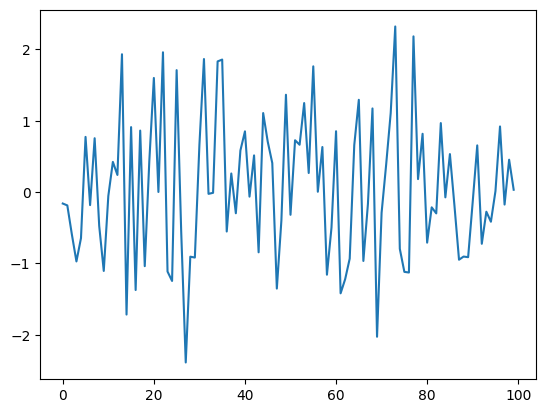

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

E = scipy.linalg.expm(np.random.randn(10,10))
print(E)
X = np.random.randn(100)

plt.plot(X)
plt.show()

You should see some text output followed by a plot.

## Julia

Now, switch to a Julia kernel, and execute the following two cells. The first one will install necessary packages for the hands-on session. This will take a while (on the order of 10 minutes), so please ensure that you have a stable Internet connection before running it. Then, proceed to checking your installation by running the second cell.

In [2]:
import Pkg

paks =  ["IJulia","Plots","LaTeXStrings","Cubature","StatsBase", "Molly","StaticArrays","Unitful","Bio3DView","KernelDensity","Measurements","Zygote"]
Pkg.add(paks)

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


    Updating `~/.julia/environments/v1.9/Project.toml`
  [2913bbd2] + StatsBase v0.34.0
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


[2.5547253853358507 2.912731125321798 1.6300506624115394 1.1356064159136932 2.761697533097764 -5.48872940630943 -3.0077809319901445 -3.4128157789895086 -1.2876633181072075 -0.6837104512600085; -4.19204200072474 9.882311686406375 8.649122879665418 -0.4726826386592133 1.4419254522737133 0.8686433920993734 -4.651397247928996 -3.020124229523971 2.8869483553254214 4.858203851487038; -2.5291709061118426 6.830079547543142 6.16312956520518 -0.3546297735966692 0.04936378995603701 1.5862150245026636 -2.313357141170515 -2.3525982854138947 2.385674373161598 3.452264492824955; -0.9186081387420778 1.3795377639682693 0.6805786298001425 0.5559204444820405 0.6304349584976587 1.821156142679357 -0.2429873268864206 -1.0134093203830188 0.44917597038712104 2.8384700381821433; -0.7188132328297913 5.017261207780732 3.023346832729128 1.2632911519592902 1.671071289040094 -0.25943415053770497 -1.4989765230306367 -2.013879532917071 -0.12575101996645277 3.380763463482447; 1.0845970291655163 -5.258044559290786 -2.7

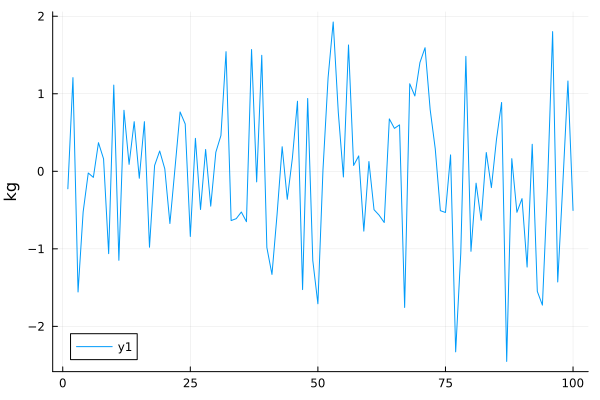

In [1]:
using Plots,Unitful

E = exp(randn(10,10))
println(E)
plot(randn(100)*u"kg")



Again, you should see some textual output followed by a plot.

## Multithreading

Some hands-on sessions will benefit from multi-threading capabilities in Julia. First, determine the number of available (logical) CPUs on your device.

- If you are using Linux, execute `lscpu` in a shell, and make note of the "CPU(s)" number.
- If you are using MacOS, execute `sysctl -a | grep cpu | grep hw` in a shell, and make note of the "hw.ncpu" number.
- If you are using Windows, execute `echo %NUMBER_OF_PROCESSORS%` in the command prompt, and make note of the output.

The next cell creates a Julia kernel with multiple threads available.

In [14]:
using IJulia

n = 8 # change to the number of logical cpus
IJulia.installkernel("Julia $n threads", env=Dict("JULIA_NUM_THREADS"=>"$n"))

import Pkg

Pkg.build("IJulia")

┌ Info: Installing Julia 8 threads kernelspec in /home/nblassel/.local/share/jupyter/kernels/julia-8-threads-1.9
└ @ IJulia /home/nblassel/.julia/packages/IJulia/Vo51o/deps/kspec.jl:105


    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/8c86e48c0db1564a1d49548d3515ced5d604c408/build.log`


    Building IJulia → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/47ac8cc196b81001a711f4b2c12c97372338f00c/build.log`


Now, restart this notebook, change the kernel to "Julia $n threads", and execute the following cell:

In [1]:
using Base.Threads

println(nthreads())

8


You should see the correct number of threads.


To remove an unwanted kernel, first run `jupyter kernelspec list` in a shell, make note of the name of the kernel you want to delete, then run `jupyter kernelspec uninstall name-of-kernel-to-delete`.